In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Let's define paths and everything
webcam_path = '../data/webcam'
drawing_path = '../data/drawing'

webcam_pics = os.listdir(webcam_path)
drawing_pics = os.listdir(drawing_path)

webcam_pics, drawing_pics

(['webcam_3.webp',
  'webcam_9a.webp',
  'webcam_2.webp',
  'webcam_5.webp',
  'webcam_4c.webp',
  'webcam_8a.webp',
  'webcam_8b.webp',
  'webcam_4a.webp',
  'webcam_7.webp',
  'webcam_4b.png',
  'webcam_6.webp',
  'webcam_8c.webp',
  'webcam_9b.webp',
  'webcam_1.webp',
  'webcam_0.webp'],
 ['drawing_1.png',
  'drawing_0.png',
  'drawing_2.png',
  'drawing_3.png',
  'drawing_7.png',
  'drawing_6.png',
  'drawing_4.png',
  'drawing_5.png',
  'drawing_8.png',
  'drawing_9.png',
  'drawing_9b.png'])

In [3]:
# First, extract labels based on the digit in the filename (using a "REGEX")

import re
webcam_labels = [int(re.search(r'\d', w).group()) for w in webcam_pics]
webcam_labels

[3, 9, 2, 5, 4, 8, 8, 4, 7, 4, 6, 8, 9, 1, 0]

In [4]:
drawing_labels = [int(re.search(r'\d', w).group()) for w in drawing_pics]
drawing_labels

[1, 0, 2, 3, 7, 6, 4, 5, 8, 9, 9]

## I. Webcam images

In [49]:
# from PIL import ImageOps

def preprocess_webcam_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    
    ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    # We need to invert the colors, because the original is white text on black background
    img = cv2.bitwise_not(img)
    
    img = np.where(img < 150, 0, 255)
    img = img / 255.0

    return img

In [50]:
# Let's check the webcam image path
os.path.join(webcam_path, webcam_pics[0])

'../data/webcam/webcam_3.webp'

In [51]:
# Create a list of processed webcam images
processed_webcam_images = []

for p in webcam_pics:
    full_path = os.path.join(webcam_path, p)
    processed_webcam_images.append(preprocess_webcam_image(full_path))

# We create an 3D-array from a list of 2D arrays
webcam_images = np.array(processed_webcam_images)
webcam_images.shape

(15, 28, 28)

Now let's see an image:

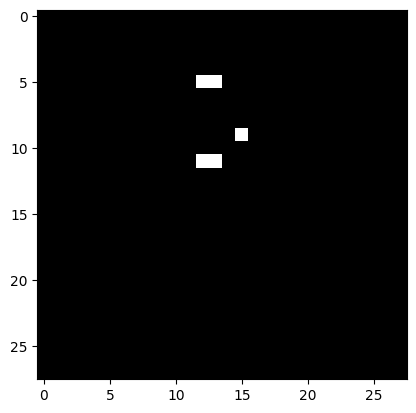

In [52]:
plt.plot()
plt.imshow(processed_webcam_images[0], cmap=plt.get_cmap('gray'))
plt.show()

In [53]:
# We need to reshape our tensor to a 4D-array (because that's the format the model accepts)
nb_images = webcam_images.shape[0]
webcam_images = webcam_images.reshape((nb_images, 28, 28, 1))
webcam_images.shape

(15, 28, 28, 1)

## II. Drawing images

In [54]:
def preprocess_drawing_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # We also invert the colors
    img = cv2.bitwise_not(img)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    
    return img

In [55]:
processed_drawing_images = []

for p in drawing_pics:
    full_path = os.path.join(drawing_path, p)
    processed_drawing_images.append(preprocess_drawing_image(full_path))

drawing_images = np.array(processed_drawing_images)
drawing_images.shape

(11, 28, 28)

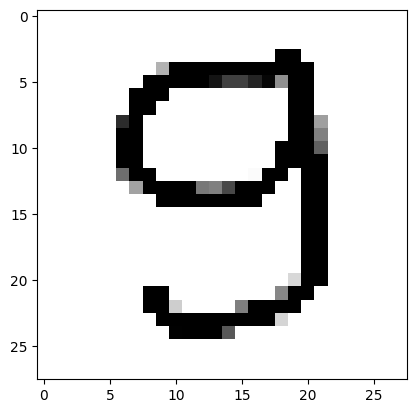

In [56]:
plt.plot()
plt.imshow(processed_drawing_images[10], cmap=plt.get_cmap('gray'))
# plt.imshow(processed_drawing_images[0])
plt.show()

In [57]:
# Reshape
nb_images = drawing_images.shape[0]
drawing_images = drawing_images.reshape((nb_images, 28, 28, 1))
drawing_images.shape

(11, 28, 28, 1)

## III. Predictions & comparison

In [58]:
# Now we can load the model from I to predict our pictures' labels
from tensorflow.keras.models import load_model
model = load_model('model_mnist.keras')

### III.a. Predict webcam

In [59]:
webcam_predictions = model.predict(webcam_images)
webcam_predictions

1/1 [==============================] - 0s 66ms/step


array([[6.63196370e-02, 2.55962415e-03, 2.15527341e-01, 4.30282159e-03,
        8.34917277e-03, 4.59568173e-01, 5.48366318e-03, 1.78737238e-01,
        3.30181705e-04, 5.88220581e-02],
       [1.29782711e-04, 1.72749779e-07, 2.13403993e-07, 3.21355510e-05,
        1.11655533e-01, 9.77026224e-02, 2.92502256e-04, 2.02492829e-05,
        7.88091481e-01, 2.07527238e-03],
       [1.91229868e-14, 2.25318036e-05, 9.99976814e-01, 5.84518546e-07,
        1.13386060e-13, 9.42516030e-12, 3.02187528e-13, 1.45950652e-09,
        2.21701679e-09, 9.81286840e-12],
       [3.56615419e-05, 2.88524939e-06, 1.38632461e-01, 3.24226334e-03,
        2.90817302e-03, 2.35913292e-01, 1.13332098e-05, 6.19110823e-01,
        2.79038545e-07, 1.42924910e-04],
       [7.71072905e-07, 4.25761755e-06, 9.83313099e-02, 7.12060323e-03,
        8.55709553e-01, 1.86221453e-03, 3.03100422e-02, 4.83487856e-05,
        6.51142513e-03, 1.01493948e-04],
       [9.36308324e-01, 1.36856499e-07, 5.01029829e-10, 6.58270153e-07,
   

In [60]:
# Apply np.argmax() for each digit to keep the highest prediction
predicted_digits = [np.argmax(pred) for pred in webcam_predictions]
predicted_digits

[5, 8, 2, 7, 4, 0, 2, 1, 1, 5, 1, 5, 5, 7, 2]

In [61]:
# As a reminder, here are the real labels:
webcam_labels

[3, 9, 2, 5, 4, 8, 8, 4, 7, 4, 6, 8, 9, 1, 0]

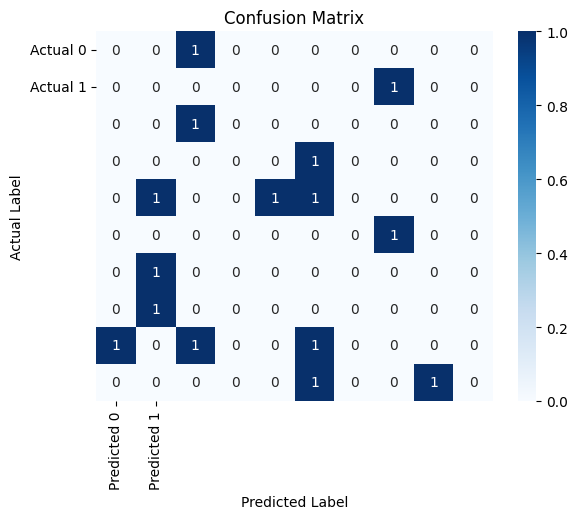

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(webcam_labels, predicted_digits)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [62]:
# Let's compare that:
comparison = [elem1 == elem2 for elem1, elem2 in zip(webcam_labels, predicted_digits)]
comparison

[False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [63]:
import math

ratio = comparison.count(True)/ len(comparison)
f"Ratio: {math.ceil(100 * ratio)}% success"

'Ratio: 14% success'

This is a terrible ratio, barely better than chance! Let's see if we have a better luck with drawings...

### III.b. Predict drawings

In [20]:
drawing_predictions = model.predict(drawing_images)
drawing_predictions

1/1 [==============================] - 0s 23ms/step


array([[6.8876879e-08, 2.9861748e-01, 6.6134780e-05, 1.3850247e-05,
        6.5216035e-01, 2.1950605e-04, 9.3472527e-09, 4.7642533e-02,
        1.5602971e-04, 1.1240435e-03],
       [4.9965143e-01, 2.2715311e-07, 2.5016256e-03, 2.4242692e-03,
        1.1256210e-04, 3.1610564e-03, 2.4287446e-01, 2.4802043e-07,
        2.4925511e-01, 1.8970199e-05],
       [1.3754226e-07, 2.2355426e-08, 9.9999887e-01, 4.7616449e-08,
        2.3747096e-14, 4.2063126e-09, 2.4282477e-07, 1.4914285e-13,
        5.9550740e-07, 2.3089965e-09],
       [4.0682326e-11, 1.6677891e-10, 9.7353677e-07, 9.6786314e-01,
        2.8056271e-10, 3.2117683e-02, 1.6309754e-08, 1.5022719e-09,
        1.6033047e-05, 1.9385295e-06],
       [7.2443788e-07, 6.1885854e-05, 9.9945939e-01, 2.3246579e-05,
        1.4845142e-07, 4.4102702e-10, 7.1951799e-06, 2.8533785e-04,
        1.6118468e-04, 1.0263115e-06],
       [5.8765824e-08, 7.6765191e-12, 2.4855188e-03, 7.6475817e-01,
        5.9337046e-13, 5.9877499e-03, 4.0190035e-04, 4.14

In [21]:
predicted_digits = [np.argmax(pred) for pred in drawing_predictions]
predicted_digits

[4, 0, 2, 3, 2, 3, 4, 5, 3, 8, 9]

In [22]:
# The real labels:
drawing_labels

[1, 0, 2, 3, 7, 6, 4, 5, 8, 9, 9]

In [23]:
# Let's compare that:
comparison = [elem1 == elem2 for elem1, elem2 in zip(drawing_labels, predicted_digits)]
comparison

[False, True, True, True, False, False, True, True, False, False, True]

In [24]:
ratio = comparison.count(True)/ len(comparison)
f"Ratio: {math.ceil(100 * ratio)}% success"

'Ratio: 55% success'

Not too bad!